In [99]:
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import cm
import random
import ares
import time

In [100]:
blobs_scalar = [ 'z_D']
blobs_1d = [ 'dTb']
blobs_1d_z = np.arange(2,15)

base_pars = \
{
    'problem_type': 101,
    'tanh_model': True,
    'blob_names': [blobs_scalar, blobs_1d],
    'blob_ivars': [None, [('z', blobs_1d_z)]],
    'blob_funcs': None,
    'verbose': False,
}

[13.27691091 13.27691091 13.27691091 13.27691091 13.27691091 15.84765203
 18.37248237 20.19352489 21.12121918 20.88014525 18.96938725 14.51725301
  6.21873541]


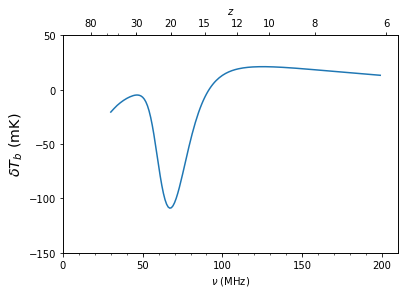

In [101]:
#make up data
free_pars_data = {'tanh_xz0': 5, 'tanh_xdz': 4}
pars = base_pars.copy() # same for each model
pars.update(free_pars_data)
data = ares.simulations.Global21cm(**pars)
data.run()
dTb_data = data.get_blob('dTb')
data.GlobalSignature(fig=3)
print dTb_data


In [102]:
def chi_square(somelist):
    chi = []
    for j in range(0,12):
        dummy = []
        dummy = dTb_data[j]- somelist[j]
        chi.append(dummy)
            
    dummy2 = np.square(chi)
    chi_squared = np.sum(dummy2)
    return chi_squared
    

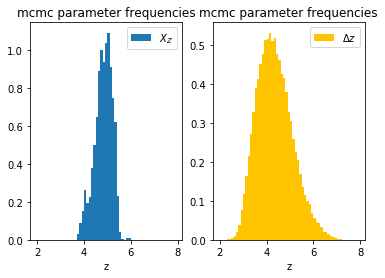

--- 6006.13646603 seconds ---


In [111]:
start_time = time.time()
def Metropolis_algorithm(walks, starting_point):
    collect_xresult = []
    collect_yresult = []
    
      
    def L(x):
        return np.exp(-0.5*x)
    
    
   
    #evaluate dTb for the initial value
    free_pars_start = {'tanh_xz0': starting_point[0], 'tanh_xdz': starting_point[1] }
    pars = base_pars.copy() #
    pars.update(free_pars_start)
    starting_sim = ares.simulations.Global21cm(**pars)
    starting_sim.run()
    dTb_starting_point = starting_sim.get_blob('dTb')
        
        
    #run the MCMC
    for i in range(1, walks-1):
        
        
        
        
        #proposal distribution for parameter space
        dr = []
        dr = [random.gauss(0, 0.01), random.gauss(0, 0.1)]
        rstar = np.add(starting_point, dr)
        #print "proposed rstar is: " , rstar
        
        #evaluate dTb for this random choice of model
        free_pars_rstar = {'tanh_xz0': rstar[0], 'tanh_xdz': rstar[1]}
        pars = base_pars.copy() # same for each model
        pars.update(free_pars_rstar)
        model_data= ares.simulations.Global21cm(**pars)
        model_data.run()
        dTb_model = model_data.get_blob('dTb')
        
        
        
        #metropolis condition
        l = L(chi_square(dTb_model))/L(chi_square(dTb_starting_point))
        
       
        
        #draw a random number between 0 and 1
        u = np.random.uniform(0,1)
        
        #run mcmc
        if u < min(1, l):
            starting_point = rstar
            dTb_starting_point = dTb_model
            collect_xresult.append(rstar[0])
            collect_yresult.append(rstar[1])
        else:
            
            collect_xresult.append(starting_point[0])
            collect_yresult.append(starting_point[1])
          
    #pl.scatter(range(i), collect_xresult, color = 'red', linewidths = 0.01)
    #pl.scatter(range(i), collect_yresult, color = 'blue' , linewidths = 0.01)
    #pl.xlabel('Num of steps')
    #pl.scatter(collect_xresult, collect_yresult)
    #pl.xlabel(r'$X_Z$')
    #pl.ylabel(r'$\Delta_z$')
    #pl.ylabel(r'$\Delta_x$ and ' ' $Z_X$')    
    
    bins1 = np.arange(2,8,0.1)
    
    #pl.hist(collect_xresult, bins1)
    #pl.hist(collect_yresult, bins1)
    #pl.xlabel(r'$Z$')
    #pl.ylabel('Number of Occurences')
    
    cmap = pl.get_cmap('jet')
    bins1 = np.arange(2,8,0.1)
    fig, axes = pl.subplots(nrows=1, ncols=2)
    ax0, ax1= axes.flatten()

   
    ax0.hist(collect_xresult, bins1, normed=1, label='$X_Z$')
    ax0.legend(prop={'size': 10})
    ax0.set_title('mcmc parameter frequencies')
    ax0.set_xlabel('z')
    
    color = cmap(0.7)
    ax1.hist(collect_yresult, bins1, normed=1, histtype='bar', color= color, label='$\Delta z$')
    ax1.legend(prop={'size': 10})
    ax1.set_title('mcmc parameter frequencies')
    ax1.set_xlabel('z')


    pl.show()

Metropolis_algorithm(100000, [6,3])
print("--- %s seconds ---" % (time.time() - start_time))

